In [1]:
import tensorflow as tf
import os,glob
import cv2
from tqdm import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import PIL
import PIL.Image

In [3]:
test_loc='C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//val'
train_loc='C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//train'

In [4]:
#dataset loader
import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size=(96,96)
batch_size=10

train_dataset=image_dataset_from_directory(train_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           validation_split=0.2,
                                           subset="training",
                                           shuffle=True,
                                           seed=42)


test_dataset=image_dataset_from_directory(test_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           shuffle=True,
                                           seed=42)

Found 8863 files belonging to 2 classes.
Using 7091 files for training.
Found 600 files belonging to 2 classes.


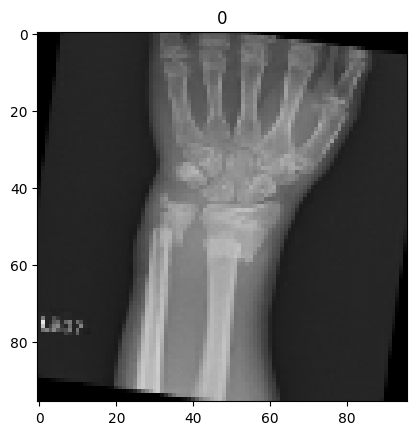

In [5]:
for images,labels in train_dataset.take(1):

    random_idx=random.randint(0,batch_size-1)

    random_image=images[random_idx]
    random_label=labels[random_idx]

    plt.imshow(random_image.numpy().astype("uint8"))
    plt.title(random_label.numpy())
    plt.show()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/30


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


222/222 ━━━━━━━━━━━━━━━━━━━━ 222s 933ms/step - accuracy: 0.5096 - loss: 0.8466 - val_accuracy: 0.4944 - val_loss: 0.7000
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 205s 921ms/step - accuracy: 0.5225 - loss: 0.6948 - val_accuracy: 0.5175 - val_loss: 0.9325
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 205s 918ms/step - accuracy: 0.7235 - loss: 0.5258 - val_accuracy: 0.4944 - val_loss: 0.6977
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 205s 919ms/step - accuracy: 0.4946 - loss: 0.6973 - val_accuracy: 0.5056 - val_loss: 0.7168
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 205s 920ms/step - accuracy: 0.4926 - loss: 0.7002 - val_accuracy: 0.5056 - val_loss: 0.6941
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 205s 919ms/step - accuracy: 0.5164 - loss: 0.6939 - val_accuracy: 0.5525 - val_loss: 0.6954
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 208s 933ms/step - accuracy: 0.6831 - loss: 0.5746 - val_accuracy: 0.5847 - val_loss: 0.7872
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 205s 920ms/step - accuracy: 0.7874 - loss: 0.45

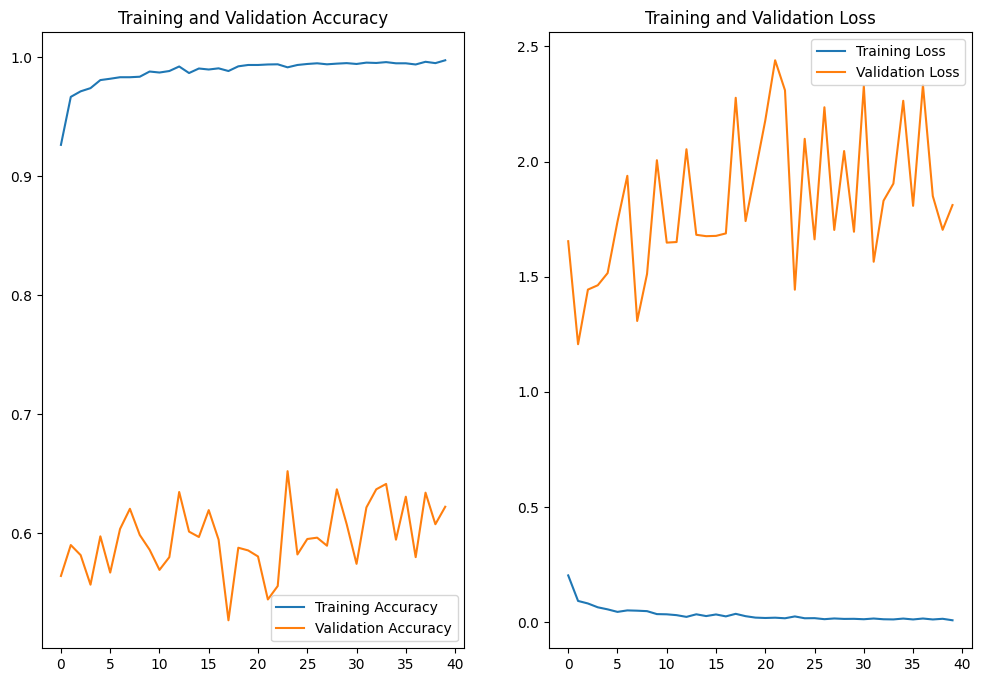

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 641ms/step
               precision    recall  f1-score   support

    fractured       0.50      0.63      0.56       896
not fractured       0.49      0.36      0.41       876

     accuracy                           0.50      1772
    macro avg       0.49      0.49      0.49      1772
 weighted avg       0.49      0.50      0.49      1772



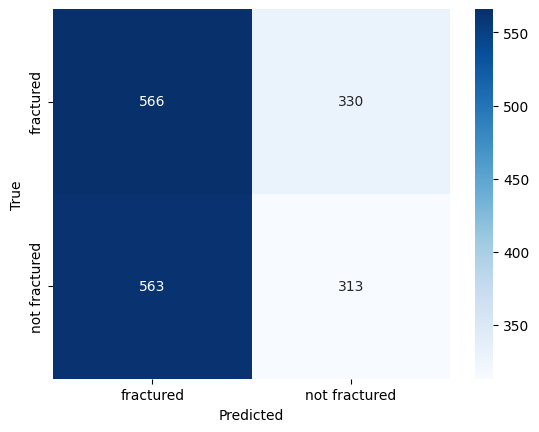

In [1]:
#densenet - attention layers and swiss function.
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D, MultiHeadAttention, Add, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.activations import swish
from tensorflow.keras.optimizers.schedules import ExponentialDecay

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def self_attention_layer(x, num_heads=8, key_dim=64):
    # Reshape the input to 3D tensor for MultiHeadAttention layer
    x_reshaped = Reshape((1, -1))(x)
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x_reshaped, x_reshaped)
    attention_output = Reshape((-1,))(attention_output)

    # Add skip connection and normalization
    attention_output = Add()([x, attention_output])
    attention_output = LayerNormalization()(attention_output)

    return attention_output

def build_densenet_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = DenseNet121(input_shape=input_shape,
                             include_top=False,
                             weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Adding dense and attention layers alternatively
    x = Dense(1024, activation=swish)(x)
    x = self_attention_layer(x)
    x = Dense(256, activation=swish)(x)
    x = self_attention_layer(x)
    x = Dense(128, activation=swish)(x)
    x = self_attention_layer(x)

    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def train_model(model, train_generator, validation_generator, epochs=30, fine_tune_at=None):
    initial_learning_rate = 0.001
    lr_schedule = ExponentialDecay(
        initial_learning_rate,
        decay_steps=1000,
        decay_rate=0.96,
        staircase=True)

    model.compile(optimizer=Adam(learning_rate=lr_schedule),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[checkpoint]
    )

    if fine_tune_at is not None:
        for layer in model.layers[:fine_tune_at]:
            layer.trainable = False
        for layer in model.layers[fine_tune_at:]:
            layer.trainable = True

        model.compile(optimizer=Adam(learning_rate=lr_schedule),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        fine_tune_epochs = 10
        total_epochs = epochs + fine_tune_epochs

        history_fine = model.fit(
            train_generator,
            epochs=total_epochs,
            validation_data=validation_generator,
            callbacks=[checkpoint]
        )

        history.history.update(history_fine.history)

    return history

def evaluate_model(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict(validation_generator)
    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def main():
    train_dir = 'C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//train'
    validation_dir = 'C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture//val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_densenet_model()

    epochs = 30
    fine_tune_at = 400  # Adjust this value based on where you want to start fine-tuning

    history = train_model(model, train_generator, validation_generator, epochs=epochs, fine_tune_at=fine_tune_at)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


In [12]:
import os
import pandas as pd

def count_images(directory):
    counts = {'fractured': 0, 'not fractured': 0}
    for category in counts.keys():
        category_path = os.path.join(directory, category)
        counts[category] = len(os.listdir(category_path))
    return counts

def collect_data(base_dir):
    data = {}
    for subset in ['train', 'val']:
        subset_path = os.path.join(base_dir, subset)
        data[subset] = count_images(subset_path)
    return data

def analyze_data(data):
    df = pd.DataFrame(data).T
    df.columns = ['Fractured', 'not fractured']
    df['Total'] = df['Fractured'] + df['not fractured']
    df['Fractured Ratio'] = df['Fractured'] / df['Total']
    df['not fractured Ratio'] = df['not fractured'] / df['Total']
    return df

def main():
    base_dir = 'C://Users//hp//Desktop//All_ Codes_and_Papers//PROJECTS_ONLY//bone_fracture'
    data = collect_data(base_dir)
    df = analyze_data(data)
    print("Dataset Balance Summary:")
    print(df)

if __name__ == "__main__":
    main()


Dataset Balance Summary:
       Fractured  not fractured  Total  Fractured Ratio  not fractured Ratio
train       4480           4383   8863         0.505472             0.494528
val          360            240    600         0.600000             0.400000
